<a href="https://colab.research.google.com/github/fawziafaraag/image_processing/blob/main/Fourier_transform_image_filtering_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

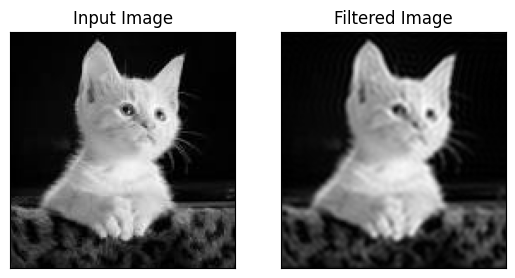

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 11 07:23:44 2023

@author: Fawzia
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('images.jfif', 0)

# Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Apply a low-pass filter
rows, cols = img.shape
crow, ccol = rows/2 , cols/2
d = 30 # cutoff distance
mask = np.zeros((rows,cols), np.uint8)
mask[int(crow)-d:int(crow)+d, int(ccol)-d:int(ccol)+d] = 1
fshift = fshift*mask

# Inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the results
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()
